In [1]:
import torch 
from torch.utils import data # 获取迭代数据
from torch.autograd import Variable # 获取变量
import torchvision
from torchvision.datasets import mnist # 获取数据集和数据预处理
import matplotlib.pyplot as plt


c:\users\dexter\pycharmprojects\pythonproject2\venv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# 数据集的预处理
data_tf = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.5],[0.5])
    ]
)

data_path = r'C:\Users\dexter\Desktop\mnist'
# 获取数据集
train_data = mnist.MNIST(data_path,train=True,transform=None,download=True)
test_data = mnist.MNIST(data_path,train=False,transform=None,download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting C:\Users\dexter\Desktop\mnist\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\dexter\Desktop\mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting C:\Users\dexter\Desktop\mnist\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\dexter\Desktop\mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting C:\Users\dexter\Desktop\mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\dexter\Desktop\mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting C:\Users\dexter\Desktop\mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\dexter\Desktop\mnist\MNIST\raw



In [5]:
train_data[0][0]

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\dexter\Desktop\mnist
    Split: Test

In [6]:
# 数据集的预处理
data_tf = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.5],[0.5])
    ]
)

data_path =  r'C:\Users\dexter\Desktop\mnist'
# 获取数据集
train_data = mnist.MNIST(data_path,train=True,transform=data_tf,download=True)
test_data = mnist.MNIST(data_path,train=False,transform=data_tf,download=True)



In [7]:
batch_size=32
train_loader = data.DataLoader(train_data,batch_size=batch_size,shuffle=True,pin_memory=True)
test_loader = data.DataLoader(test_data,batch_size=batch_size)


In [8]:
#导入相关的包
import torch.nn as nn#网络结构
import torch.nn.functional as F
import torch.optim as optim#优化器


In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,20,5,1)
        self.conv2=nn.Conv2d(20,50,5,1)
        self.fc1=nn.Linear(4*4*50,500)
        self.fc2=nn.Linear(500,10)
    def forward(self,x):
        #x是一个batch_size的数据
        #x:1*28*28
        x=F.relu(self.conv1(x))
        #20*24*24
        x=F.max_pool2d(x,2,2)
        #20*12*12
        x=F.relu(self.conv2(x))
        #50*8*8
        x=F.max_pool2d(x,2,2)
        #50*4*4
        x=x.view(-1,50*4*4)
        #压扁成了行向量，(1,50*4*4)
        x=F.relu(self.fc1(x))
        #(1,500)
        x=self.fc2(x)
        #(1,10)
        return F.log_softmax(x,dim=1)      


In [10]:
lr=0.01#学习率
momentum=0.5
device=torch.device("cuda" if torch.cuda.is_available() else "cpu" )
model=CNN().to(device)
optimizer=optim.SGD(model.parameters(),lr=lr,momentum=momentum)


In [11]:
def train(model,device,train_loader,optimizer,epoch,losses):
    model.train()
    for idx,(t_data,t_target) in enumerate(train_loader):
        t_data,t_target=t_data.to(device),t_target.to(device)
        pred=model(t_data)#batch_size*10
        loss=F.nll_loss(pred,t_target)
        
        #SGD
        optimizer.zero_grad()#将上一步的梯度清0
        loss.backward()#重新计算梯度
        optimizer.step()#更新参数
        if idx%100==0:
            print("epoch:{},iteration:{},loss:{}".format(epoch,idx,loss.item()))
            losses.append(loss.item()) #每100批数据采样一次loss，记录下来，用来画图可视化分析。    


In [12]:
num_epochs=2
losses=[]#记录起来用来画图的，可以画出损失随着迭代次数而下降。
from time import *
begin_time=time()#测试我们的模型训练要花多久。
for epoch in range(num_epochs):
    train(model,device,train_loader,optimizer,epoch,losses)
end_time=time()


epoch:0,iteration:0,loss:2.2959845066070557
epoch:0,iteration:100,loss:1.6976501941680908
epoch:0,iteration:200,loss:0.48518824577331543
epoch:0,iteration:300,loss:0.4518811106681824
epoch:0,iteration:400,loss:0.7433546781539917
epoch:0,iteration:500,loss:0.24810059368610382
epoch:0,iteration:600,loss:0.2881802022457123
epoch:0,iteration:700,loss:0.2251397669315338
epoch:0,iteration:800,loss:0.16591134667396545
epoch:0,iteration:900,loss:0.20017556846141815
epoch:0,iteration:1000,loss:0.06958632916212082
epoch:0,iteration:1100,loss:0.04407820105552673
epoch:0,iteration:1200,loss:0.31965371966362
epoch:0,iteration:1300,loss:0.057501111179590225
epoch:0,iteration:1400,loss:0.03024725429713726
epoch:0,iteration:1500,loss:0.05093846842646599
epoch:0,iteration:1600,loss:0.14045585691928864
epoch:0,iteration:1700,loss:0.02726849727332592
epoch:0,iteration:1800,loss:0.06216919794678688
epoch:1,iteration:0,loss:0.04598299786448479
epoch:1,iteration:100,loss:0.06869325786828995
epoch:1,iteratio

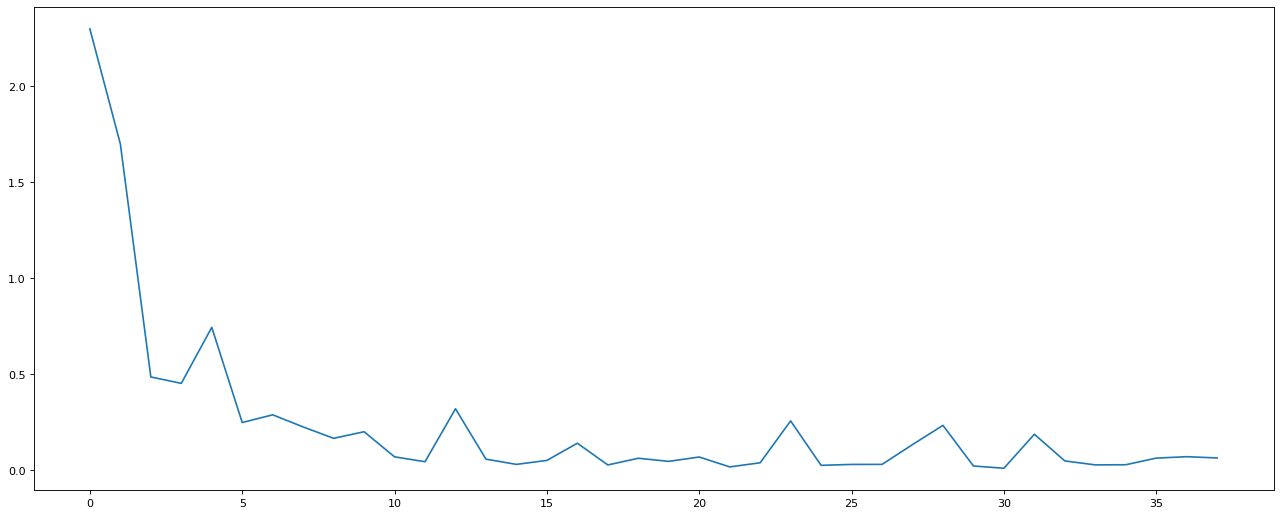

67.01875734329224

In [14]:
import matplotlib.pyplot as plt
len_l=len(losses)
x=[i for i in range(len_l)]
figure=plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,losses)
plt.show()
-begin_time + end_time

In [16]:
def test(model,device,test_loader):
    model.eval()
    correct=0#预测对了几个。
    with torch.no_grad():
        for idx,(t_data,t_target) in enumerate(test_loader):
            t_data,t_target=t_data.to(device),t_target.to(device)
            pred=model(t_data)#batch_size*10
            pred_class=pred.argmax(dim=1)#batch_size*10->batch_size*1
            correct+=pred_class.eq(t_target.view_as(pred_class)).sum().item()
    acc=correct/len(test_data)
    print("accuracy:{},".format(acc))



In [17]:
test(model,device,test_loader)


accuracy:0.9838,
